In [1]:
# import packages
import numpy as np
import matplotlib.pyplot as pp
import pylab
import scipy
import pandas as pd
from scipy.optimize import curve_fit
import pickle

from models_functions import mf_noseg, mf_noseg_FI, mf_seg, mf_seg_FI, mf_seg_orig, mf_seg_orig_FI

%matplotlib inline

# import model and curvefit functions
# from models_functions import mf_noseg
# from fit_functions import fit_mf_noseg

# list of files
list_of_files=['hoaxy_4th-mysterious-death-connected-to-the-dnc_cum','hoaxy_alicia-machado-adult-star_cum','hoaxy_bill-clinton-illegitimate-son_cum','hoaxy_black-lives-matter-protesters-chant-for-dead-cops-now-in-baton-rouge_cum','hoaxy_black-protesters-targeted-whites-in-milwaukee_cum','hoaxy_clinton-byrd-photo-klan_cum','hoaxy_clinton-compliant-citizenry_cum','hoaxy_clinton-secret-earpiece-debate_cum','hoaxy_clintons_zeifman_cum','hoaxy_debate-secret-hand-signals_cum','hoaxy_deray-mckesson-and-the-summer-of-chaos_cum','hoaxy_dnc-hiring-actors-via-craigslist-to-replace-delegates_cum','hoaxy_dr-drew-hillary-clinton-health_cum','hoaxy_flags-banned-at-dnc_cum','hoaxy_google-manipulate-hillary-clinton_cum','hoaxy_hillary-clinton-freed-child-rapist-laughed-about-it_cum','hoaxy_hillary-clinton-has-parkinsons-disease_cum','hoaxy_hillary-clinton-medical-records-leaked_cum','hoaxy_hillary-clinton-seizure-video_cum','hoaxy_julian-assange-bernie-sanders-was-threatened_cum','hoaxy_khizr-khan-375000-clinton-foundation_cum','hoaxy_khizr-khan-is-a-muslim-brotherhood-agent_cum','hoaxy_mexico-border-trump-elected_cum','hoaxy_michael-savage-removed_cum','hoaxy_muslims-in-japan_cum','hoaxy_politics-sites-mismatched-clinton-rally-image-goes-viral_cum','hoaxy_satire_sharia_cum','hoaxy_seth-conrad-rich_cum','hoaxy_three-syrian-refugees-assault-5-year-old-girl-at-knifepoint_cum','hoaxy_tim-kaine-white-people-minority_cum','hoaxy_yokohillary_cum']
path_file = "../../data/"

# threshold for when a contagion is said to have plateaud
plateau_threshold = 48;

# Function definitions

In [2]:
def fit_mf_noseg(T_double, alpha, ONEoverN, ba_init, bi_init, pv, omega):
    T = T_double[:len(T_double)/2]
    BA, FA = mf_noseg(T, alpha, ONEoverN, ba_init, bi_init, pv, omega)
    return np.append(BA, FA)

def fit_mf_noseg_FI(T_double, alpha, ONEoverN, ba_init, bi_init, fa_init, fi_init, pv, omega):
    T = T_double[:len(T_double)/2]
    BA, FA = mf_noseg_FI(T, alpha, ONEoverN, ba_init, bi_init, fa_init, fi_init, pv, omega)
    return np.append(BA, FA)

def fit_mf_seg(T_double, alphag, alphas, ONEoverN, ba_initg, bi_initg, ba_inits, bi_inits, pvg, pvs, omega, gulsize, s):
    T = T_double[:len(T_double)/2]
    BA, FA = mf_seg(T, alphag, alphas, ONEoverN, ba_initg, bi_initg, ba_inits, bi_inits, pvg, pvs, omega, gulsize, s)
    return np.append(BA, FA)

def fit_mf_seg_FI(T_double, alphag, alphas, ONEoverN, ba_initg, bi_initg, ba_inits, bi_inits, fa_initg, fi_initg, fa_inits, fi_inits, pvg, pvs, omega, gulsize, s):
    T = T_double[:len(T_double)/2]
    BA, FA = mf_seg_FI(T, alphag, alphas, ONEoverN, ba_initg, bi_initg, ba_inits, bi_inits, fa_initg, fi_initg, fa_inits, fi_inits, pvg, pvs, omega, gulsize, s)
    return np.append(BA, FA)

def fit_mf_seg_orig(T_double, alpha, ONEoverN, ba_initg, bi_initg, ba_inits, bi_inits, pvs, omega, gulsize, s):
    T = T_double[:len(T_double)/2]
    BA, FA = mf_seg_orig(T, alpha, ONEoverN, ba_initg, bi_initg, ba_inits, bi_inits, pvs, omega, gulsize, s)
    return np.append(BA, FA)

def fit_mf_seg_orig_FI(T_double, alpha, ONEoverN, ba_initg, bi_initg, ba_inits, bi_inits, fa_initg, fi_initg, fa_inits, fi_inits, pvs, omega, gulsize, s):
    T = T_double[:len(T_double)/2]
    BA, FA = mf_seg_orig_FI(T, alpha, ONEoverN, ba_initg, bi_initg, ba_inits, bi_inits, fa_initg, fi_initg, fa_inits, fi_inits, pvs, omega, gulsize, s)
    return np.append(BA, FA)




# Model fitting

For each data set
 - read and filter in the data
 - fit the non segregated model
 - plot and meaure the difference
 

# Fit using non segregated model

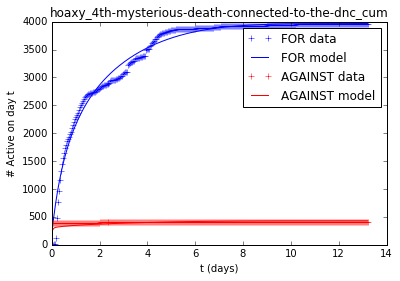

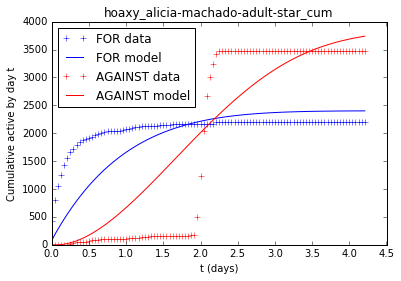

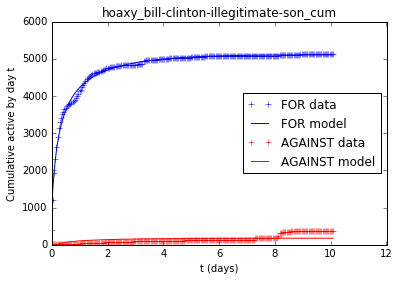

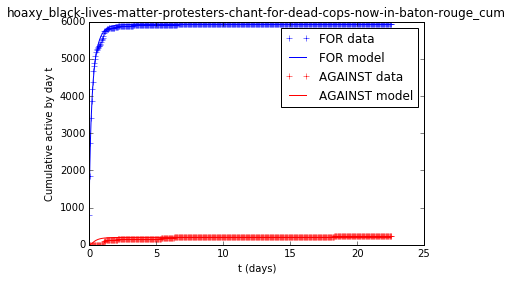

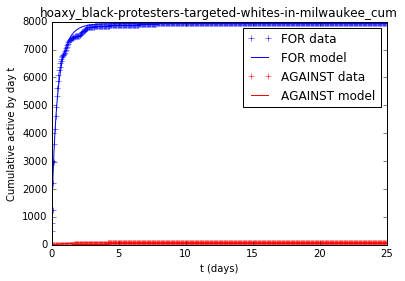

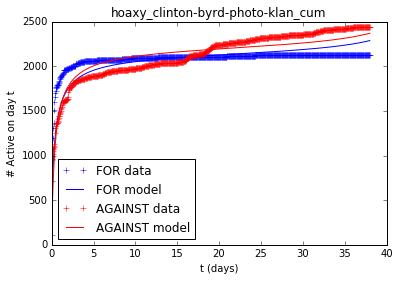

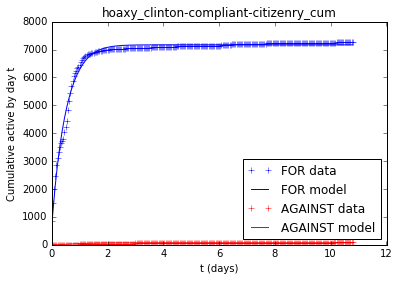

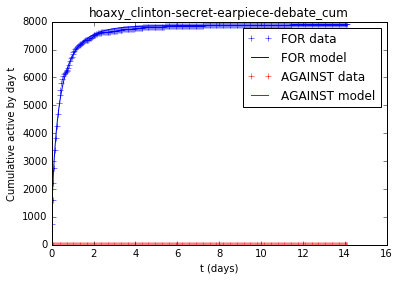

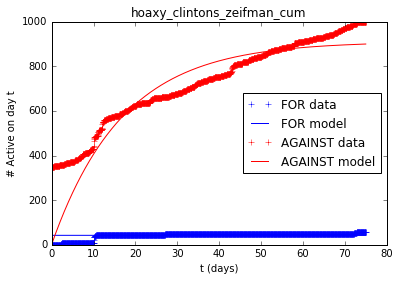

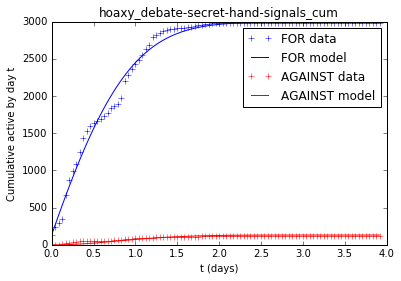

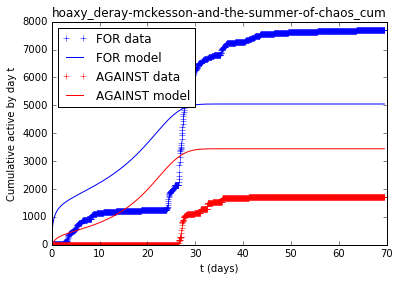

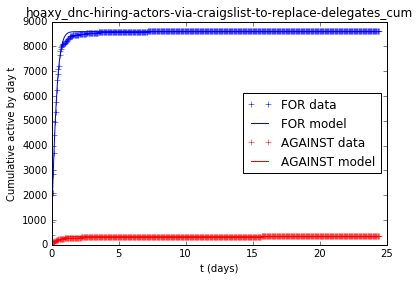

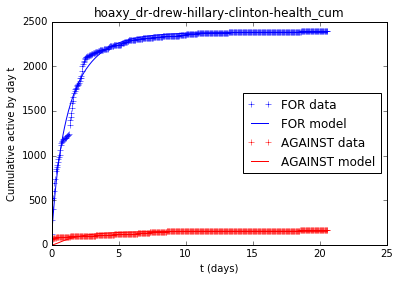

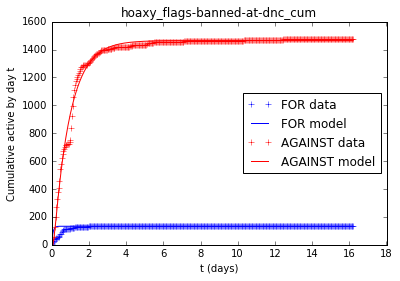

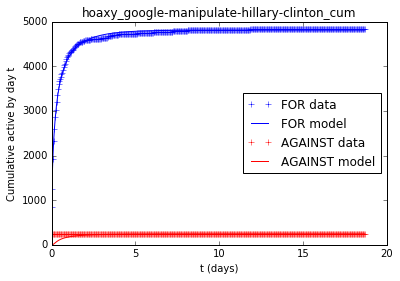

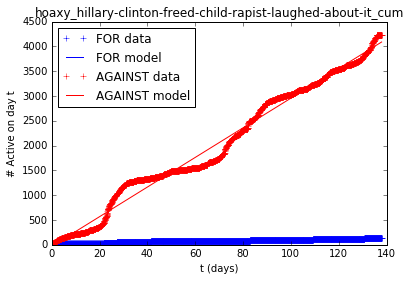

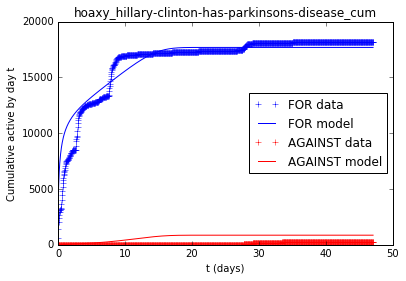

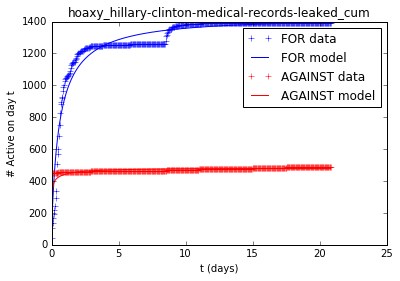

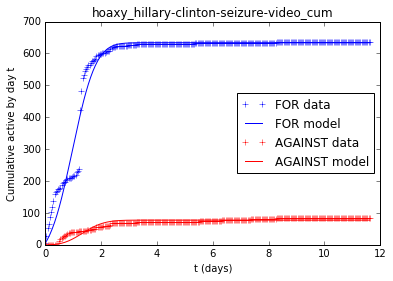

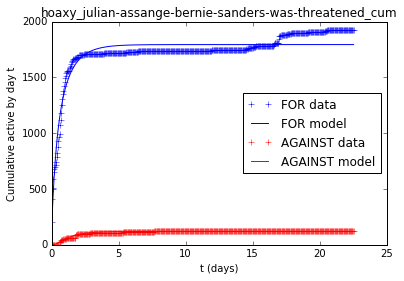

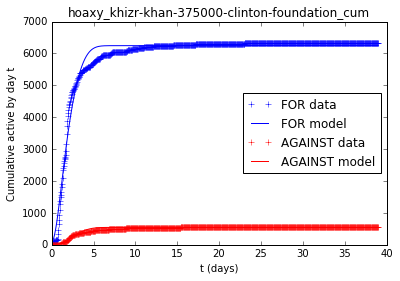

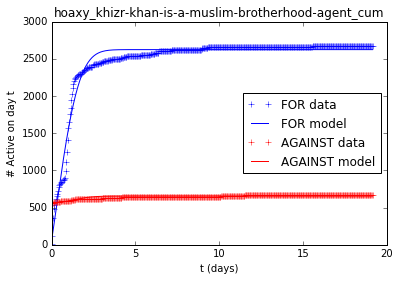

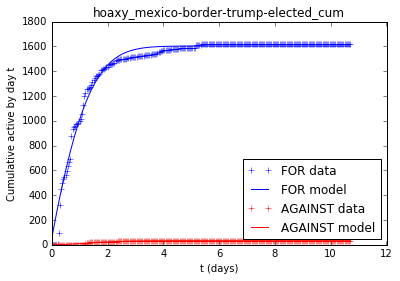

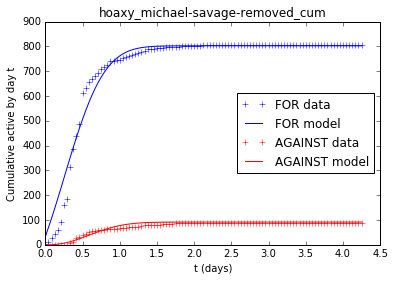

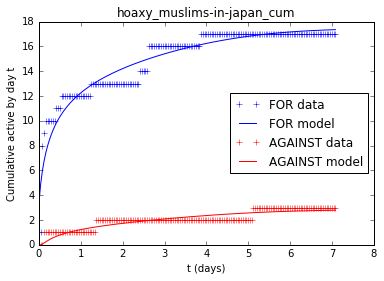

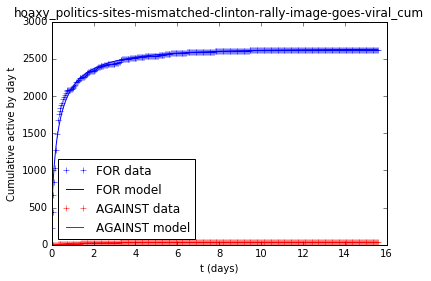

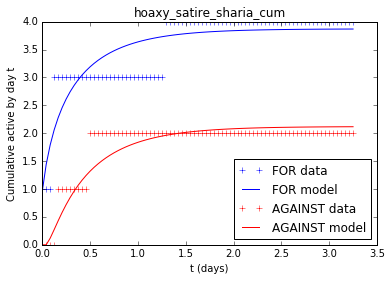

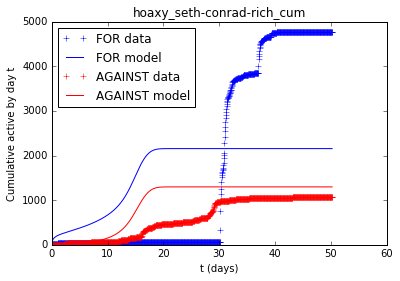

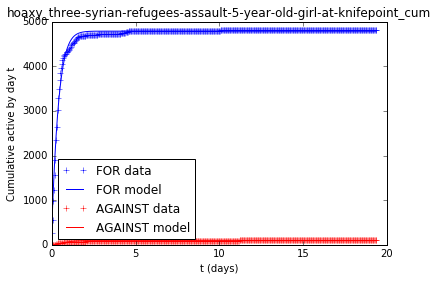

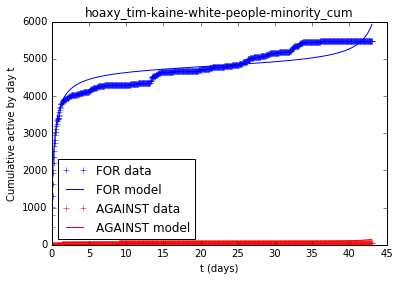

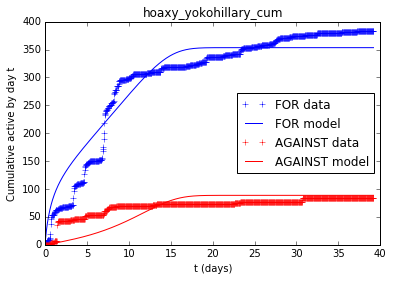

In [20]:
noseg_fit_popt = [];
noseg_fit_pstd = [];
noseg_fit_RMSerror = [];
noseg_fit_NRMSerror = [];

for i in np.linspace(0,len(list_of_files)-1,len(list_of_files),dtype=int):
    
    # READ DATA

    file_name = str(list_of_files[i])
    hoax_data = pd.read_csv(path_file+file_name+'.csv',parse_dates=True)
    for_users = hoax_data["For"]
    against_users = hoax_data["Against"]
    t_empirical=np.arange(0,len(for_users))

    # FILTER DATA

    # remove the initial plateau from the data
    first_nonzero = np.nonzero(for_users)[0][0]
    for_users = for_users[first_nonzero:]
    against_users = against_users[first_nonzero:]

    # find the position of the end of the dynamics (including buffer plateau at end of length plateau_threshold)
    d_for_users = np.subtract(for_users[plateau_threshold-1:],for_users[0:-plateau_threshold+1]);
    d_against_users = np.subtract(against_users[plateau_threshold-1:],against_users[0:-plateau_threshold+1]);
    plateau = np.nonzero((np.add(d_for_users,d_against_users))==0)[0];
    if (plateau.size > 0):
        temporal_window = plateau[0] + plateau_threshold
        for_users = for_users[0:temporal_window]
        against_users = against_users[0:temporal_window]

    t_empirical=np.arange(0,len(for_users))

    # CURVEFIT AND PLOT

    if against_users.values[0] > for_users.values[0]:  #Initial fraction of factchecker
        #params = [alpha, ONEoverN, ba_init, bi_init, fa_init, fi_init, pv, omega]
        param0 =0.5,0.0001,0.001,0.001,0.001, 0.001, 0.5,0.5
        param_bounds =([0., 0., 0, 0., 0., 0., 0., 0.], [1., 1., 1., 1., 1. ,1., 1., 1.])

        # Curve fit
        T_double = np.append(t_empirical, t_empirical)
        data_double = np.append(for_users, against_users)
        popt, pcov = curve_fit(fit_mf_noseg_FI, T_double, data_double, p0=param0,bounds=param_bounds, max_nfev=10000)

        # Save measurements
        noseg_fit_popt.append(popt)
        pstd = np.asarray(np.sqrt(np.diag(pcov)))
        noseg_fit_pstd.append(pstd)
        
        BA, FA = mf_noseg_FI(t_empirical,*popt)
        noseg_fit_RMSerror.append(np.sqrt(np.sum(np.square(np.append(BA,FA) - data_double))/len(data_double)))
        noseg_fit_NRMSerror.append(np.sqrt(np.sum(np.square(np.append(BA,FA) - data_double))/len(data_double))/np.average(data_double))
        
        # Plot
        pp.figure()
        pp.plot(t_empirical/24., for_users, 'b+',t_empirical/24., 
            BA,'b-', t_empirical/24., against_users, 'r+',t_empirical/24., 
            FA,'r-')
        pp.xlabel("t (days)")
        pp.ylabel("# Active on day t")
        pp.title(file_name)
        pp.legend(['FOR data', 'FOR model','AGAINST data', 'AGAINST model'],loc=0)
        pp.savefig("../../output/hoaxy_ALL/fits/"+str(i+1)+"_noseg.pdf")
        pp.show()

    else:
        #params = [alpha, ONEoverN, ba_init, bi_init, pv, omega]
        param0 =0.5,0.0001,0.001, 0.001, 0.5,0.5
        param_bounds =([0, 0., 0., 0., 0., 0.], [1., 1., 1., 1., 1. ,1.])

        # Curve fit
        T_double = np.append(t_empirical, t_empirical)
        data_double = np.append(for_users, against_users)
        popt, pcov = curve_fit(fit_mf_noseg, T_double, data_double, p0=param0,bounds=param_bounds, max_nfev=10000)

        # Save measurements
        noseg_fit_popt.append(np.insert(popt,4,[0, 0]))
        pstd = np.asarray(np.sqrt(np.diag(pcov)))
        pstd = np.insert(pstd,4,[0, 0])
        noseg_fit_pstd.append(pstd)
        
        BA, FA = mf_noseg(t_empirical,*popt)
        noseg_fit_RMSerror.append(np.sqrt(np.sum(np.square(np.append(BA,FA) - data_double))/len(data_double)))
        noseg_fit_NRMSerror.append(np.sqrt(np.sum(np.square(np.append(BA,FA) - data_double))/len(data_double))/np.average(data_double))
        
        # Plot
        pp.figure()
        pp.plot(t_empirical/24., for_users, 'b+',t_empirical/24., 
            BA,'b-', t_empirical/24., against_users, 'r+',t_empirical/24., 
            FA,'r-')
        pp.xlabel("t (days)")
        pp.ylabel("Cumulative active by day t")
        pp.title(file_name)
        pp.legend(['FOR data', 'FOR model','AGAINST data', 'AGAINST model'],loc=0)
        pp.savefig("../../output/hoaxy_ALL/fits/"+str(i+1)+"_noseg.pdf")
        pp.show()
    

# Save output to csv file
np.savetxt(path_file+"processed/RMSerrors_noseg.csv", noseg_fit_RMSerror, delimiter=",")
np.savetxt(path_file+"processed/NRMSerrors_noseg.csv", noseg_fit_NRMSerror, delimiter=",")
np.savetxt(path_file+"processed/popt_noseg.csv", noseg_fit_popt, delimiter=",")
np.savetxt(path_file+"processed/pstd_noseg.csv", noseg_fit_pstd, delimiter=",")

# Fit using original segregated model

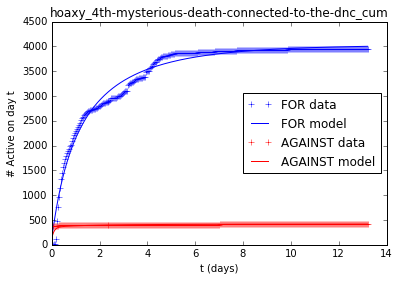

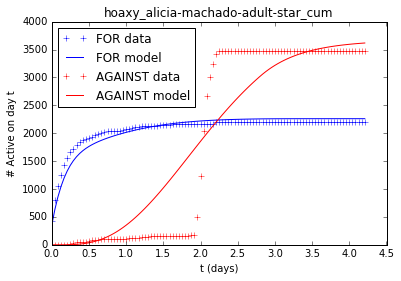

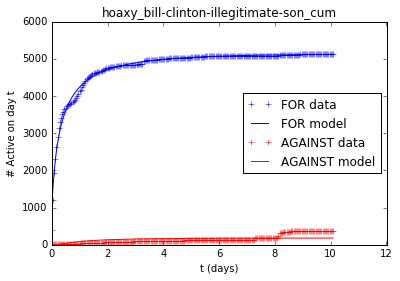

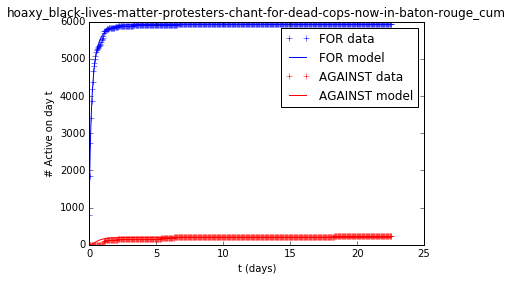

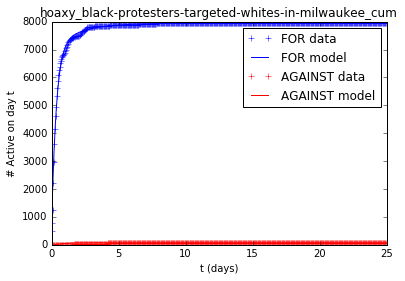

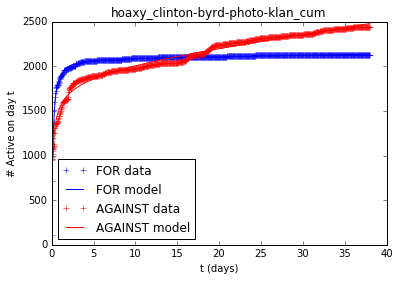

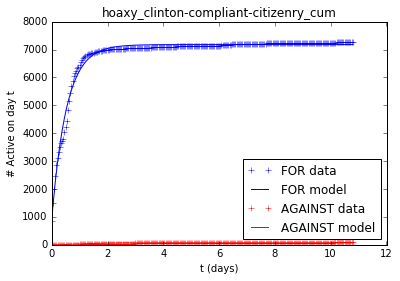

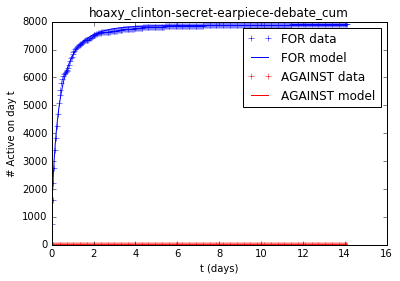

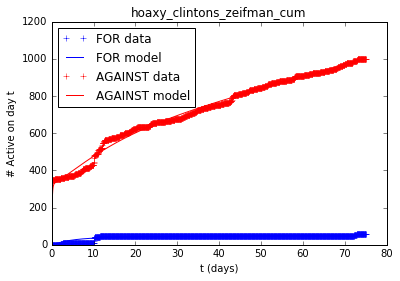

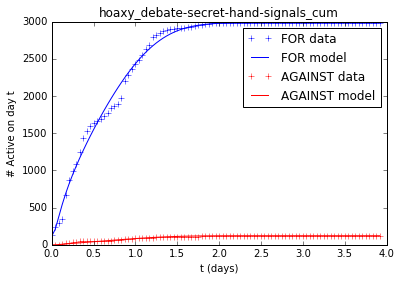

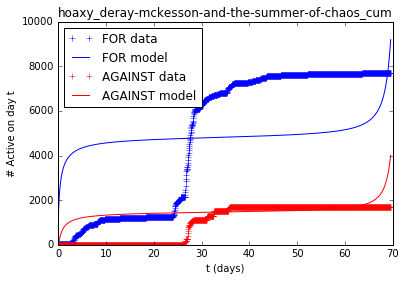

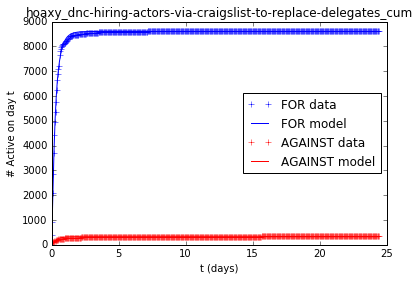

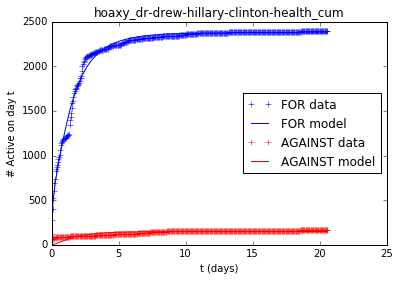

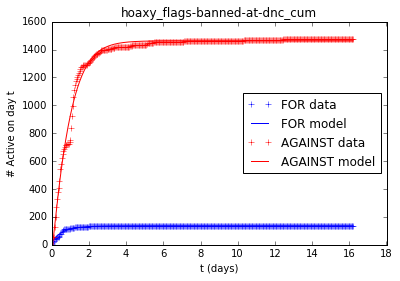

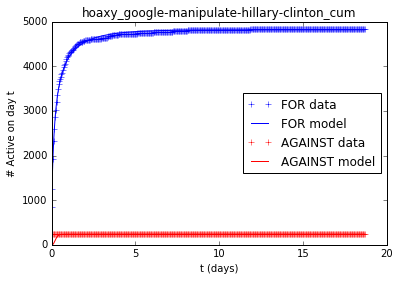

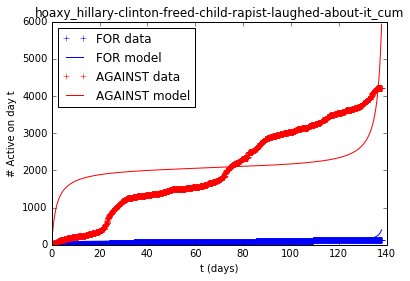

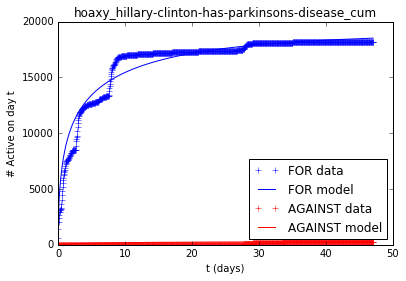

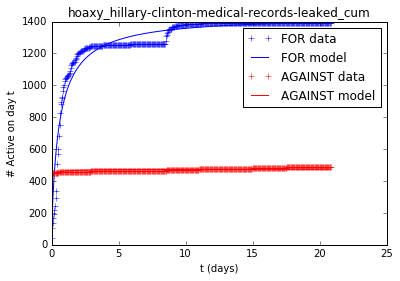

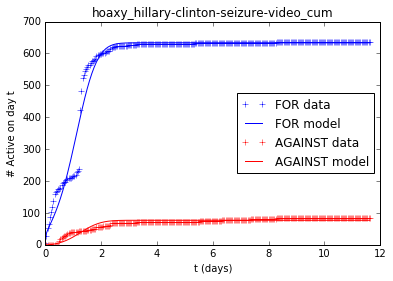

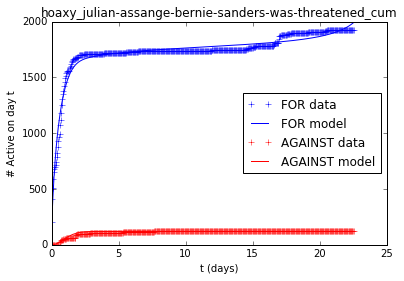

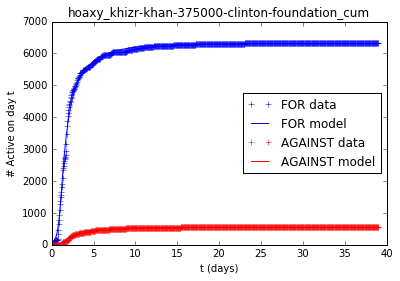

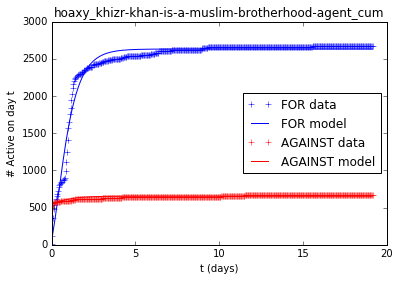

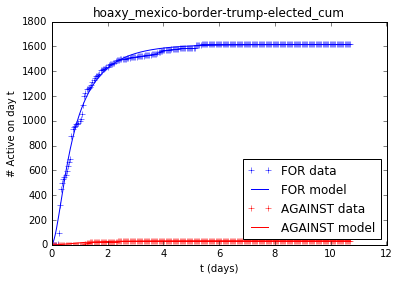

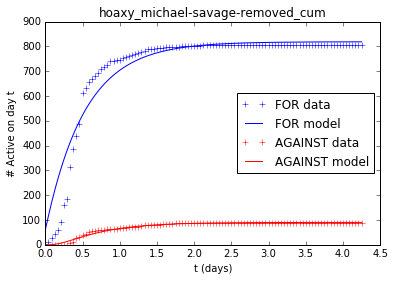

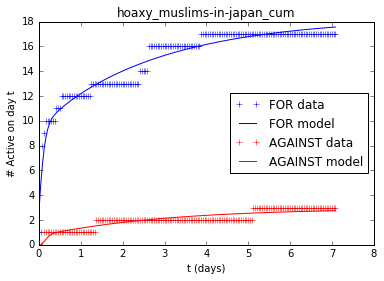

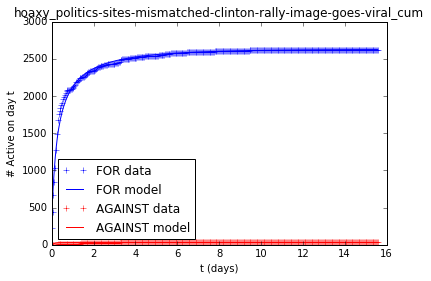

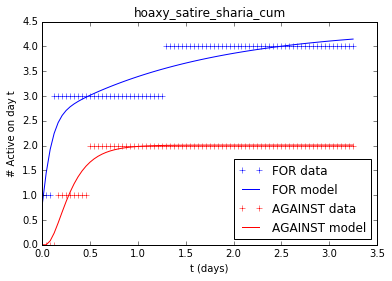

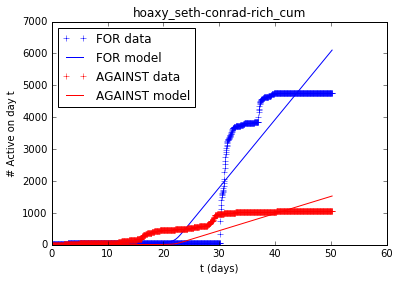

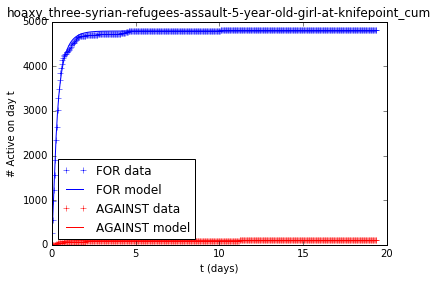

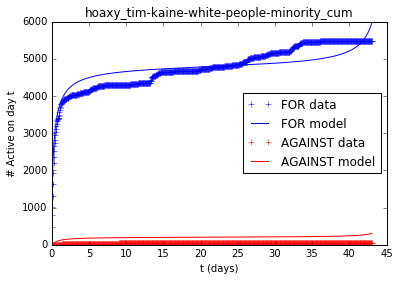

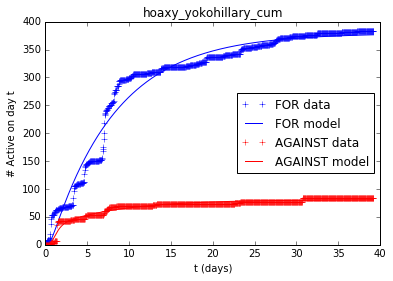

In [21]:
seg_orig_fit_popt = [];
seg_orig_fit_pstd = [];
seg_orig_fit_RMSerror = [];
seg_orig_fit_NRMSerror = [];

for i in np.linspace(0,len(list_of_files)-1,len(list_of_files),dtype=int):
    
    # READ DATA

    file_name = str(list_of_files[i])
    hoax_data = pd.read_csv(path_file+file_name+'.csv',parse_dates=True)
    for_users = hoax_data["For"]
    against_users = hoax_data["Against"]
    t_empirical=np.arange(0,len(for_users))

    # FILTER DATA

    # remove the initial plateau from the data
    first_nonzero = np.nonzero(for_users)[0][0]
    for_users = for_users[first_nonzero:]
    against_users = against_users[first_nonzero:]

    # find the position of the end of the dynamics (including buffer plateau at end of length plateau_threshold)
    d_for_users = np.subtract(for_users[plateau_threshold-1:],for_users[0:-plateau_threshold+1]);
    d_against_users = np.subtract(against_users[plateau_threshold-1:],against_users[0:-plateau_threshold+1]);
    plateau = np.nonzero((np.add(d_for_users,d_against_users))==0)[0];
    if (plateau.size > 0):
        temporal_window = plateau[0] + plateau_threshold
        for_users = for_users[0:temporal_window]
        against_users = against_users[0:temporal_window]

    t_empirical=np.arange(0,len(for_users))

    # CURVEFIT AND PLOT

    if against_users.values[0] > for_users.values[0]: # If theres an initial number of factcheckers
        #params = [alpha, ONEoverN, ba_initg, bi_initg, ba_inits, bi_inits, fa_initg, fi_initg, fa_inits, fi_inits, pvs, omega, gulsize, s]
        param0 =0.5,0.0001,0.001,0.001,0.001,0.001,0.001,0.001,0.001,0.001,0.5,0.5,0.5,0.5
        param_bounds =([0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
                       [1., 1., 1., 1. ,1., 1., 1., 1., 1., 1., 1., 1., 1., 1])

        # Curve fit
        T_double = np.append(t_empirical, t_empirical)
        data_double = np.append(for_users, against_users)
        popt, pcov = curve_fit(fit_mf_seg_orig_FI, T_double, data_double, p0=param0,bounds=param_bounds, max_nfev=10000)
        
        # Save measurements
        seg_orig_fit_popt.append(popt)
        pstd = np.asarray(np.sqrt(np.diag(pcov)))
        seg_orig_fit_pstd.append(pstd)
        
        BA, FA = mf_seg_orig_FI(t_empirical,*popt)
        seg_orig_fit_RMSerror.append(np.sqrt(np.sum(np.square(np.append(BA,FA) - data_double))/len(data_double)))
        seg_orig_fit_NRMSerror.append(np.sqrt(np.sum(np.square(np.append(BA,FA) - data_double))/len(data_double))/np.average(data_double))

        # Plot
        pp.figure()
        pp.plot(t_empirical/24., for_users, 'b+',t_empirical/24., 
            BA,'b-', t_empirical/24., against_users, 'r+',t_empirical/24., 
            FA,'r-')
        pp.xlabel("t (days)")
        pp.ylabel("# Active on day t")
        pp.title(file_name)
        pp.legend(['FOR data', 'FOR model','AGAINST data', 'AGAINST model'],loc=0)
        pp.savefig("../../output/hoaxy_ALL/fits/"+str(i+1)+"_seg_orig.pdf")
        pp.show()
        
    else:    
        #params = [alpha, ONEoverN, ba_initg, bi_initg, ba_inits, bi_inits, pvs, omega, gulsize, s]
        param0 =0.5,0.0001,0.001,0.001,0.001,0.001,0.5,0.5,0.5,0.5
        param_bounds =([0., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
                       [1., 1., 1., 1. ,1., 1., 1., 1., 1., 1.])

        # Curve fit
        T_double = np.append(t_empirical, t_empirical)
        data_double = np.append(for_users, against_users)
        popt, pcov = curve_fit(fit_mf_seg_orig, T_double, data_double, p0=param0,bounds=param_bounds, max_nfev=10000)

   
        # Save measurements
        seg_orig_fit_popt.append(np.insert(popt,6,[0, 0, 0, 0]))
        pstd = np.asarray(np.sqrt(np.diag(pcov)))
        pstd = np.insert(pstd,6,[0, 0, 0, 0])
        seg_orig_fit_pstd.append(pstd)
        
        BA, FA = mf_seg_orig(t_empirical,*popt)
        seg_orig_fit_RMSerror.append(np.sqrt(np.sum(np.square(np.append(BA,FA) - data_double))/len(data_double)))
        seg_orig_fit_NRMSerror.append(np.sqrt(np.sum(np.square(np.append(BA,FA) - data_double))/len(data_double))/np.average(data_double))

        # Plot
        pp.figure()
        pp.plot(t_empirical/24., for_users, 'b+',t_empirical/24., 
            BA,'b-', t_empirical/24., against_users, 'r+',t_empirical/24., 
            FA,'r-')
        pp.xlabel("t (days)")
        pp.ylabel("# Active on day t")
        pp.title(file_name)
        pp.legend(['FOR data', 'FOR model','AGAINST data', 'AGAINST model'],loc=0)
        pp.savefig("../../output/hoaxy_ALL/fits/"+str(i+1)+"_seg_orig.pdf")
        pp.show()

    
# Save output to csv file
np.savetxt(path_file+"processed/RMSerrors_seg_orig.csv", seg_orig_fit_RMSerror, delimiter=",")
np.savetxt(path_file+"processed/NRMSerrors_seg_orig.csv", seg_orig_fit_NRMSerror, delimiter=",")
np.savetxt(path_file+"processed/popt_seg_orig.csv", seg_orig_fit_popt, delimiter=",")
np.savetxt(path_file+"processed/pstd_seg_orig.csv", seg_orig_fit_pstd, delimiter=",")

# Fit using full segregated model


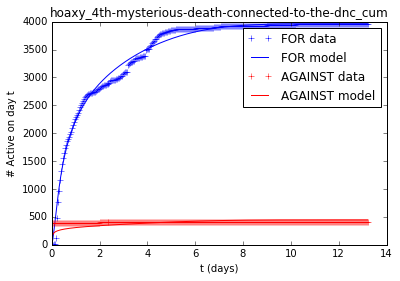

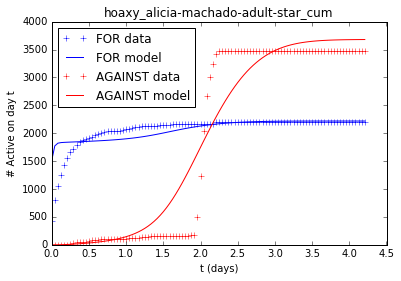

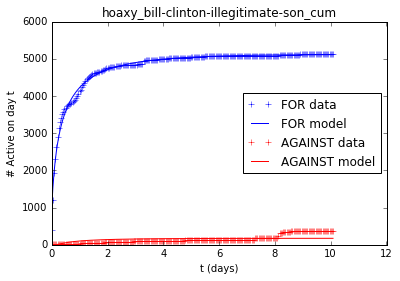

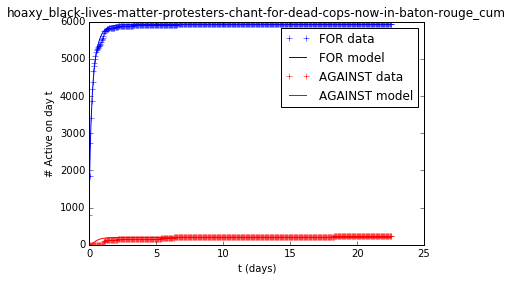

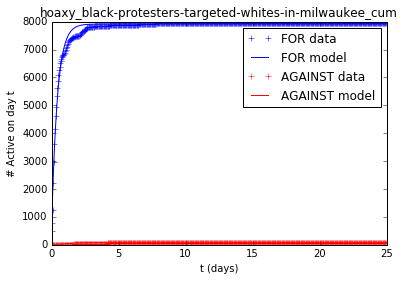

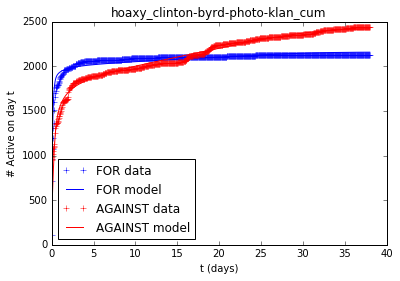

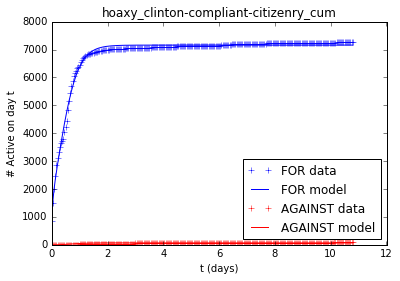

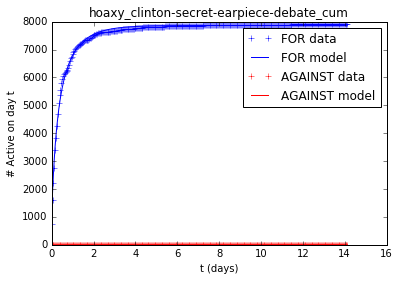

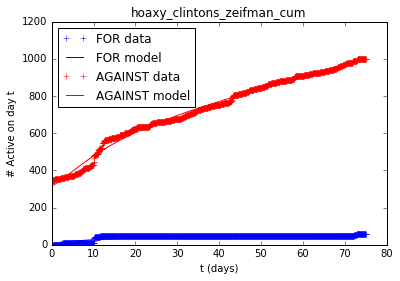

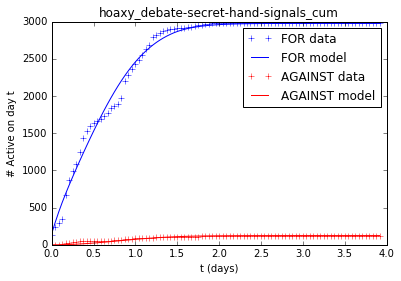

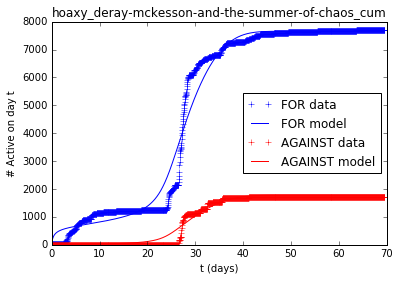

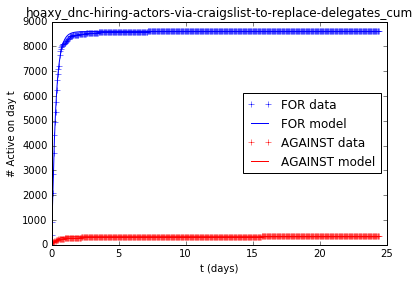

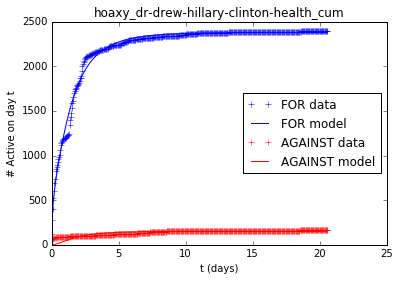

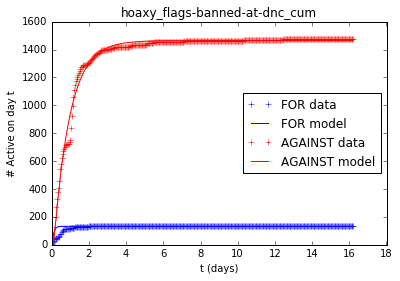

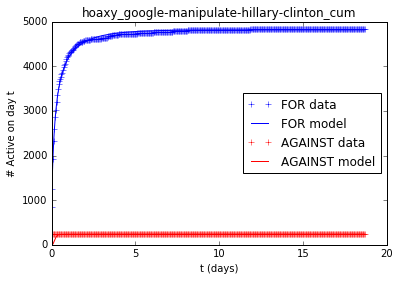

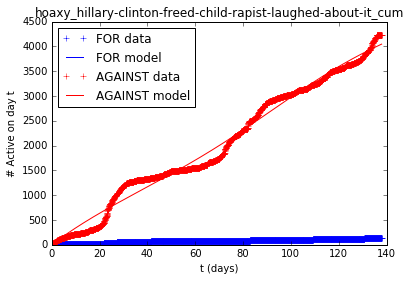

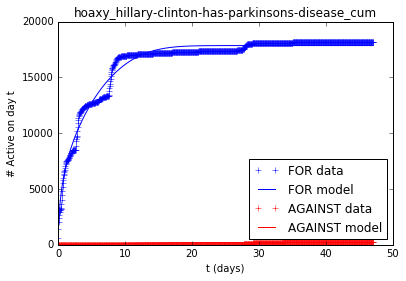

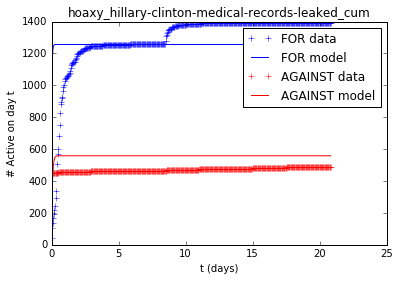

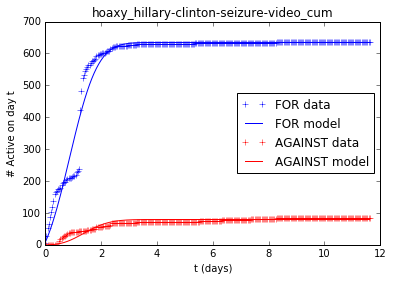

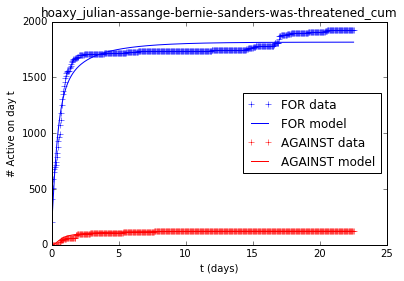

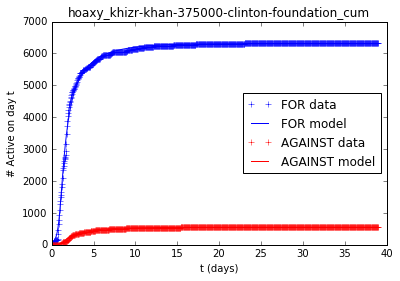

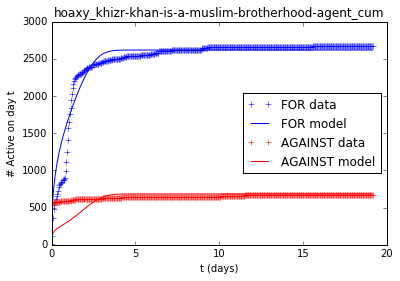

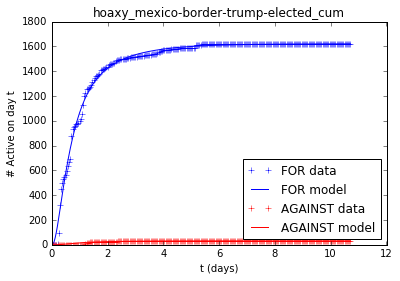

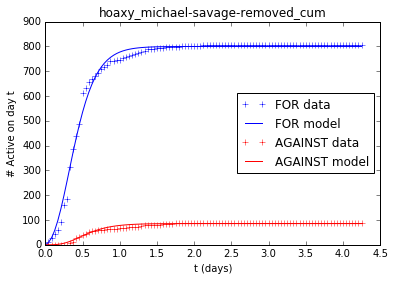

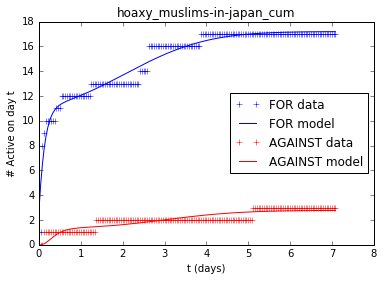

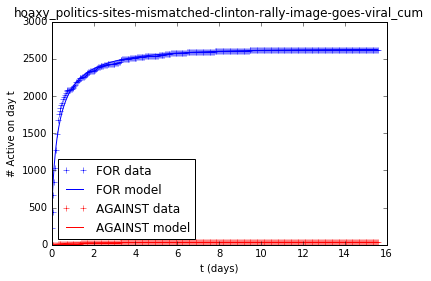

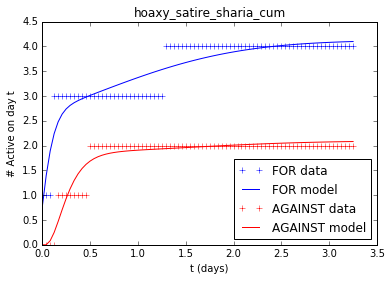

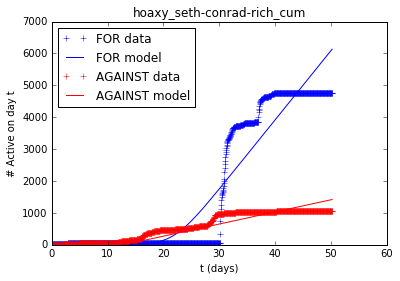

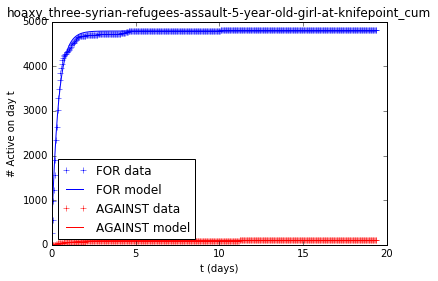

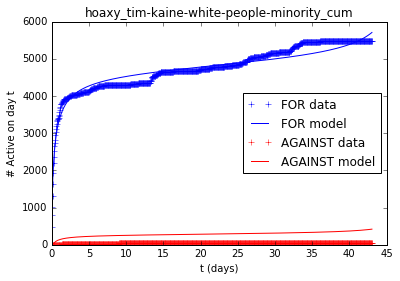

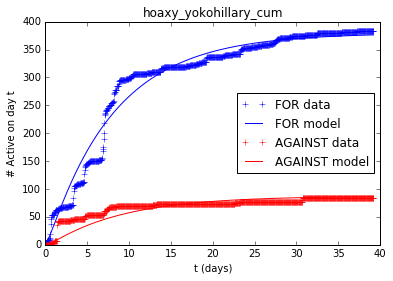

In [19]:
seg_fit_popt = [];
seg_fit_pstd = [];
seg_fit_RMSerror = [];
seg_fit_NRMSerror = [];

for i in np.linspace(0,len(list_of_files)-1,len(list_of_files),dtype=int):
    
    # READ DATA

    file_name = str(list_of_files[i])
    hoax_data = pd.read_csv(path_file+file_name+'.csv',parse_dates=True)
    for_users = hoax_data["For"]
    against_users = hoax_data["Against"]
    t_empirical=np.arange(0,len(for_users))

    # FILTER DATA

    # remove the initial plateau from the data
    first_nonzero = np.nonzero(for_users)[0][0]
    for_users = for_users[first_nonzero:]
    against_users = against_users[first_nonzero:]

    # find the position of the end of the dynamics (including buffer plateau at end of length plateau_threshold)
    d_for_users = np.subtract(for_users[plateau_threshold-1:],for_users[0:-plateau_threshold+1]);
    d_against_users = np.subtract(against_users[plateau_threshold-1:],against_users[0:-plateau_threshold+1]);
    plateau = np.nonzero((np.add(d_for_users,d_against_users))==0)[0];
    if (plateau.size > 0):
        temporal_window = plateau[0] + plateau_threshold
        for_users = for_users[0:temporal_window]
        against_users = against_users[0:temporal_window]

    t_empirical=np.arange(0,len(for_users))

    # CURVEFIT AND PLOT

    if against_users.values[0] > for_users.values[0]: # If theres an initial number of factcheckers
        #params = [alphag, alphas, ONEoverN, ba_initg, bi_initg, ba_inits, bi_inits, fa_initg, fi_initg, fa_inits, fi_inits, pvg, pvs, omega, gulsize, s]
        param0 =0.5,0.5,0.0001,0.001,0.001,0.001,0.001,0.001,0.001,0.001,0.001,0.5,0.5,0.5,0.5,0.5
        param_bounds =([0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
                       [1., 1., 1., 1., 1. ,1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1])

        # Curve fit
        T_double = np.append(t_empirical, t_empirical)
        data_double = np.append(for_users, against_users)
        popt, pcov = curve_fit(fit_mf_seg_FI, T_double, data_double, p0=param0,bounds=param_bounds, max_nfev=10000)
        
        # Save measurements
        seg_fit_popt.append(popt)
        pstd = np.asarray(np.sqrt(np.diag(pcov)))
        seg_fit_pstd.append(pstd)
        
        BA, FA = mf_seg_FI(t_empirical,*popt)
        seg_fit_RMSerror.append(np.sqrt(np.sum(np.square(np.append(BA,FA) - data_double))/len(data_double)))
        seg_fit_NRMSerror.append(np.sqrt(np.sum(np.square(np.append(BA,FA) - data_double))/len(data_double))/np.average(data_double))

        # Plot
        pp.figure()
        pp.plot(t_empirical/24., for_users, 'b+',t_empirical/24., 
            BA,'b-', t_empirical/24., against_users, 'r+',t_empirical/24., 
            FA,'r-')
        pp.xlabel("t (days)")
        pp.ylabel("# Active on day t")
        pp.title(file_name)
        pp.legend(['FOR data', 'FOR model','AGAINST data', 'AGAINST model'],loc=0)
        pp.savefig("../../output/hoaxy_ALL/fits/"+str(i+1)+"_seg.pdf")
        pp.show()
        
    else:    
        #params = [alphag, alphas, ONEoverN, ba_initg, bi_initg, ba_inits, bi_inits, pvg, pvs, omega, gulsize, s]
        param0 =0.5,0.5,0.0001,0.001,0.001,0.001,0.001,0.5,0.5,0.5,0.5,0.5
        param_bounds =([0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
                       [1., 1., 1., 1., 1. ,1., 1., 1., 1., 1., 1., 1.])

        # Curve fit
        T_double = np.append(t_empirical, t_empirical)
        data_double = np.append(for_users, against_users)
        popt, pcov = curve_fit(fit_mf_seg, T_double, data_double, p0=param0,bounds=param_bounds, max_nfev=10000)

   
        # Save measurements
        seg_fit_popt.append(np.insert(popt,7,[0, 0, 0, 0]))
        pstd = np.asarray(np.sqrt(np.diag(pcov)))
        pstd = np.insert(pstd,7,[0, 0, 0, 0])
        seg_fit_pstd.append(pstd)
        
        BA, FA = mf_seg(t_empirical,*popt)
        seg_fit_RMSerror.append(np.sqrt(np.sum(np.square(np.append(BA,FA) - data_double))/len(data_double)))
        seg_fit_NRMSerror.append(np.sqrt(np.sum(np.square(np.append(BA,FA) - data_double))/len(data_double))/np.average(data_double))

        # Plot
        pp.figure()
        pp.plot(t_empirical/24., for_users, 'b+',t_empirical/24., 
            BA,'b-', t_empirical/24., against_users, 'r+',t_empirical/24., 
            FA,'r-')
        pp.xlabel("t (days)")
        pp.ylabel("# Active on day t")
        pp.title(file_name)
        pp.legend(['FOR data', 'FOR model','AGAINST data', 'AGAINST model'],loc=0)
        pp.savefig("../../output/hoaxy_ALL/fits/"+str(i+1)+"_seg.pdf")
        pp.show()

    
# Save output to csv file
np.savetxt(path_file+"processed/RMSerrors_seg.csv", seg_fit_RMSerror, delimiter=",")
np.savetxt(path_file+"processed/NRMSerrors_seg.csv", seg_fit_NRMSerror, delimiter=",")
np.savetxt(path_file+"processed/popt_seg.csv", seg_fit_popt, delimiter=",")
np.savetxt(path_file+"processed/pstd_seg.csv", seg_fit_pstd, delimiter=",")

### Save output

### Analysis

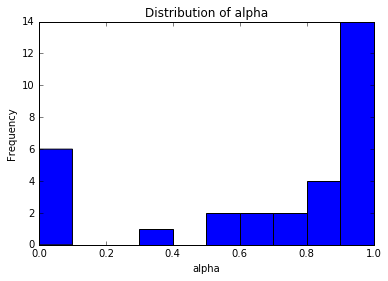

Low belief hoaxs:

['hoaxy_clinton-byrd-photo-klan_cum'
 'hoaxy_google-manipulate-hillary-clinton_cum'
 'hoaxy_hillary-clinton-freed-child-rapist-laughed-about-it_cum'
 'hoaxy_mexico-border-trump-elected_cum' 'hoaxy_satire_sharia_cum'
 'hoaxy_three-syrian-refugees-assault-5-year-old-girl-at-knifepoint_cum']


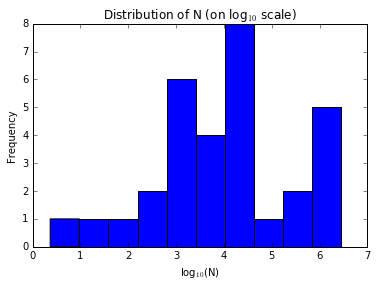

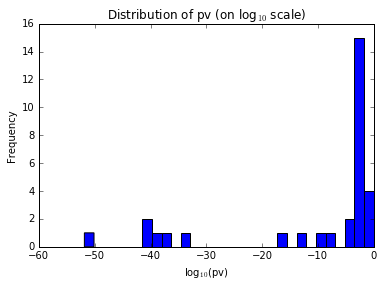

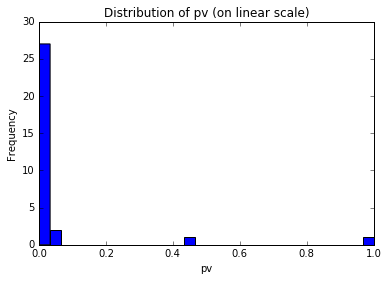

Non-negligible verification:

['hoaxy_bill-clinton-illegitimate-son_cum'
 'hoaxy_hillary-clinton-has-parkinsons-disease_cum']


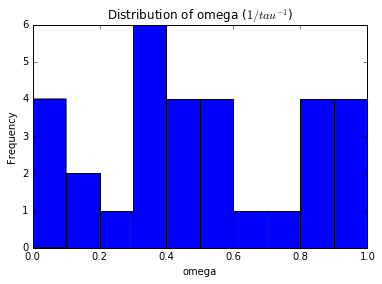

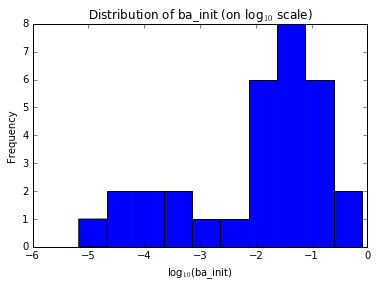

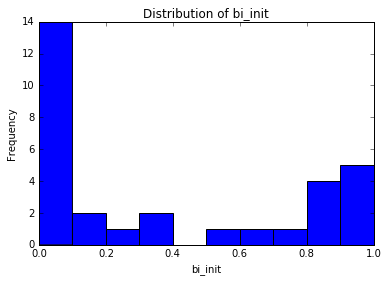

High initial fraction of inactive believers:

['hoaxy_4th-mysterious-death-connected-to-the-dnc_cum'
 'hoaxy_clinton-byrd-photo-klan_cum'
 'hoaxy_clinton-compliant-citizenry_cum'
 'hoaxy_deray-mckesson-and-the-summer-of-chaos_cum'
 'hoaxy_dr-drew-hillary-clinton-health_cum'
 'hoaxy_google-manipulate-hillary-clinton_cum'
 'hoaxy_hillary-clinton-freed-child-rapist-laughed-about-it_cum'
 'hoaxy_hillary-clinton-has-parkinsons-disease_cum'
 'hoaxy_julian-assange-bernie-sanders-was-threatened_cum'
 'hoaxy_khizr-khan-is-a-muslim-brotherhood-agent_cum'
 'hoaxy_mexico-border-trump-elected_cum' 'hoaxy_michael-savage-removed_cum']
Low initial fraction of inactive believers:

['hoaxy_alicia-machado-adult-star_cum'
 'hoaxy_bill-clinton-illegitimate-son_cum'
 'hoaxy_black-lives-matter-protesters-chant-for-dead-cops-now-in-baton-rouge_cum'
 'hoaxy_black-protesters-targeted-whites-in-milwaukee_cum'
 'hoaxy_clinton-secret-earpiece-debate_cum' 'hoaxy_clintons_zeifman_cum'
 'hoaxy_debate-secret-hand-sign

In [17]:
params_noseg = np.append(np.asarray(noseg_fit_poptFI)[:,[0,1,2,3,6,7]],np.asarray(noseg_fit_popt),axis=0).T
param_label_noseg = ["alpha", "N", "ba_init", "bi_init", "pv", "omega"]

# alpha
pp.hist(params_noseg[0],range=(0,1))
pp.title("Distribution of " + param_label_noseg[0])
pp.xlabel(param_label_noseg[0])
pp.ylabel("Frequency")
pp.savefig("../../output/hoaxy_ALL/param_distributions/alpha.pdf")
pp.show()

print "Low belief hoaxs:\n"
print np.asarray(list_of_files)[params_noseg[0] < 0.1]

# N
pp.hist(np.log10(np.ones(len(params_noseg[1]))/params_noseg[1]))
pp.title("Distribution of " + param_label_noseg[1] + " (on log$_{10}$ scale)")
pp.xlabel("log$_{10}$(" + param_label_noseg[1] + ")")
pp.ylabel("Frequency")
pp.savefig("../../output/hoaxy_ALL/param_distributions/N.pdf")
pp.show()

# pv
pp.hist(np.log10(params_noseg[4]),bins = 30)
pp.title("Distribution of " + param_label_noseg[4] + " (on log$_{10}$ scale)")
pp.xlabel("log$_{10}$(" + param_label_noseg[4] + ")")
pp.ylabel("Frequency")
pp.savefig("../../output/hoaxy_ALL/param_distributions/pv_logscale.pdf")
pp.show()

pp.hist(params_noseg[4],bins = 30)
pp.title("Distribution of " + param_label_noseg[4] + " (on linear scale)")
pp.xlabel(param_label_noseg[4])
pp.ylabel("Frequency")
pp.savefig("../../output/hoaxy_ALL/param_distributions/pv.pdf")
pp.show()

print "Non-negligible verification:\n"
print np.asarray(list_of_files)[params_noseg[4] > 0.1]

# omega
pp.hist(params_noseg[5],range=(0,1))
pp.title("Distribution of " + param_label_noseg[5] + " ($1/tau^{-1}$)")
pp.xlabel(param_label_noseg[5])
pp.ylabel("Frequency")
pp.savefig("../../output/hoaxy_ALL/param_distributions/omega.pdf")
pp.show()

# ba_init
pp.hist(np.log10(params_noseg[2]))
pp.title("Distribution of " + param_label_noseg[2] + " (on log$_{10}$ scale)")
pp.xlabel("log$_{10}$(" + param_label_noseg[2] + ")")
pp.ylabel("Frequency")
pp.savefig("../../output/hoaxy_ALL/param_distributions/ba_init.pdf")
pp.show()

# bi_init
pp.hist(params_noseg[3],range=(0,1))
pp.title("Distribution of " + param_label_noseg[3])
pp.xlabel(param_label_noseg[3])
pp.ylabel("Frequency")
pp.savefig("../../output/hoaxy_ALL/param_distributions/bi_init.pdf")
pp.show()

print "High initial fraction of inactive believers:\n"
print np.asarray(list_of_files)[params_noseg[3] > 0.5]

print "Low initial fraction of inactive believers:\n"
print np.asarray(list_of_files)[params_noseg[3] < 0.5]

In [31]:
pstd

array([  5.36392530e+01,   2.42755017e+00,   1.90377516e-04,
         2.79231668e-01,   3.07215259e-01,   5.27773021e+00,
         2.02359056e+01,   3.54333953e-01,   1.57354373e-01,
         8.25334970e-01,   1.20368119e-02,   6.84968954e-01])

In [205]:
# Save outputs
f = open("../../data/processed/outputs_seg.pckl","wb")
pickle.dump([seg_fit_popt,seg_fit_poptFI,seg_fit_pcov,seg_fit_pcovFI,seg_fit_RMSerror,seg_fit_NRMSerror,seg_fit_MPerror], f)
f.close()

### Comparison of errors

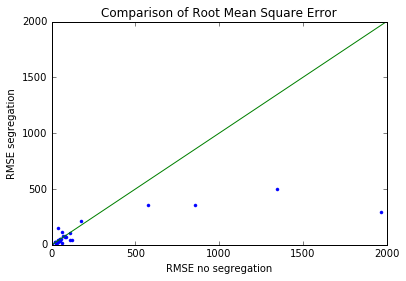

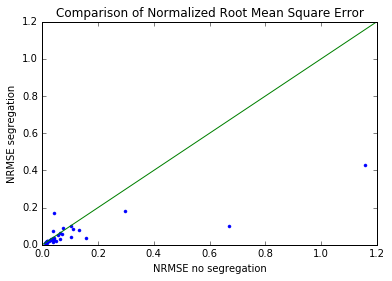

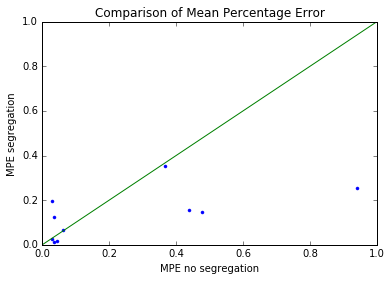

In [19]:
pp.figure()
pp.plot(noseg_fit_RMSerror,seg_fit_RMSerror,".",np.linspace(0,2000),np.linspace(0,2000))
pp.xlabel("RMSE no segregation")
pp.ylabel("RMSE segregation")
pp.title("Comparison of Root Mean Square Error")
pp.savefig("../../output/hoaxy_ALL/errors/RMSEcomparison.pdf")
pp.show()

pp.figure()
pp.plot(noseg_fit_NRMSerror,seg_fit_NRMSerror,".",np.linspace(0,1.2),np.linspace(0,1.2))
pp.xlabel("NRMSE no segregation")
pp.ylabel("NRMSE segregation")
pp.title("Comparison of Normalized Root Mean Square Error")
pp.savefig("../../output/hoaxy_ALL/errors/NRMSEcomparison.pdf")
pp.show()

pp.figure()
pp.plot(noseg_fit_MPerror,seg_fit_MPerror,".",np.linspace(0,1),np.linspace(0,1))
pp.xlabel("MPE no segregation")
pp.ylabel("MPE segregation")
pp.title("Comparison of Mean Percentage Error")
pp.savefig("../../output/hoaxy_ALL/errors/MPEcomparison.pdf")
pp.show()

In [264]:

print np.nonzero([x > 500 for x in noseg_fit_RMSerror])[0]
print np.nonzero([x > 0.2 for x in noseg_fit_NRMSerror])[0]
print np.asarray(list_of_files)[[1,10,16,27]]

[ 1 10 16 27]
[ 1 10 27]
['hoaxy_alicia-machado-adult-star_cum'
 'hoaxy_deray-mckesson-and-the-summer-of-chaos_cum'
 'hoaxy_hillary-clinton-has-parkinsons-disease_cum'
 'hoaxy_seth-conrad-rich_cum']


# Fit using only For data

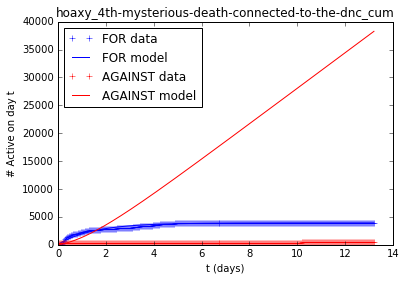

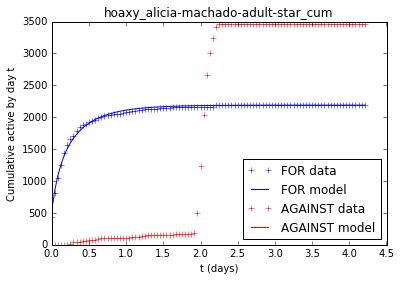

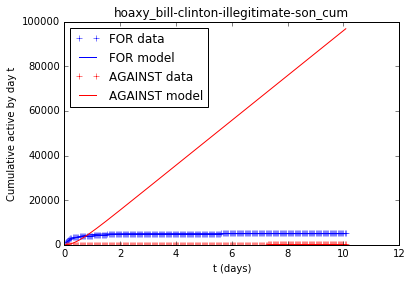

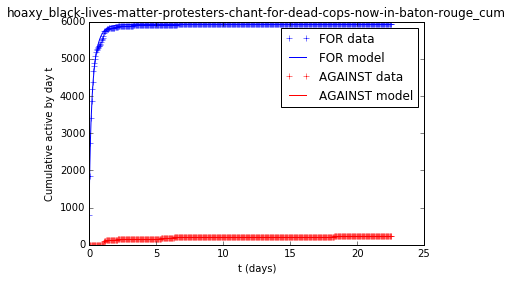

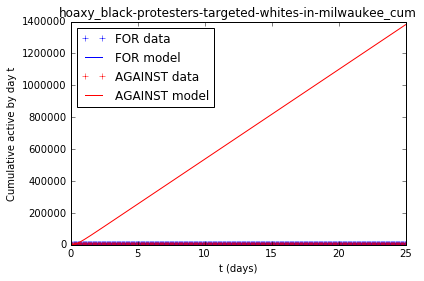

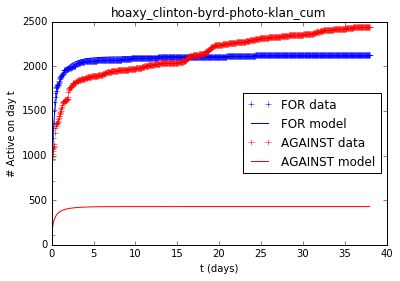

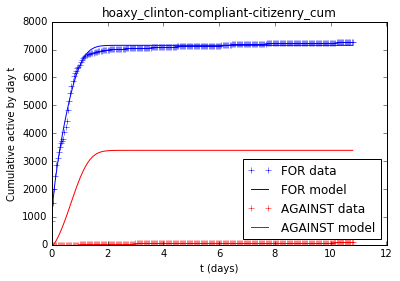

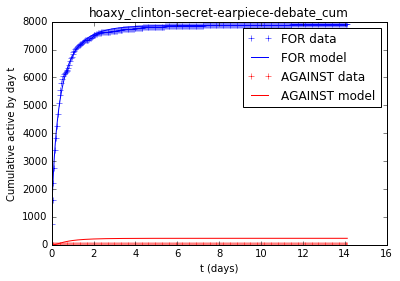

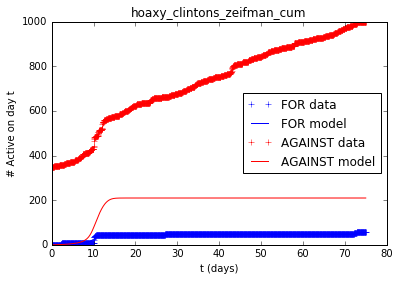

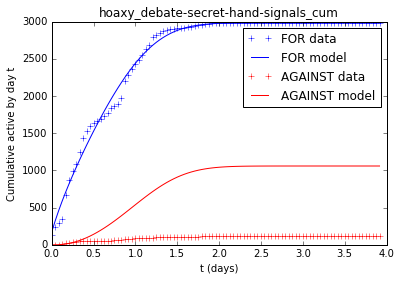

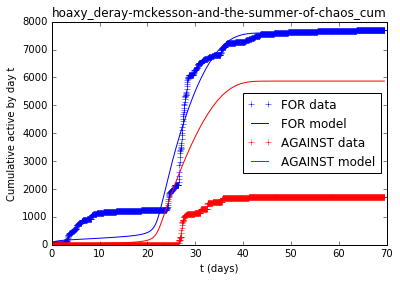

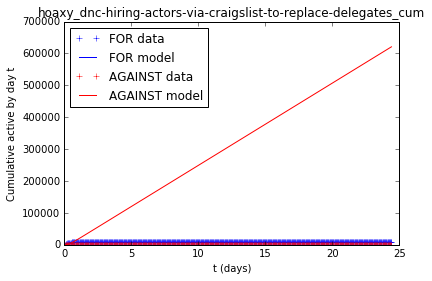

RuntimeError: Optimal parameters not found: The maximum number of function evaluations is exceeded.

In [121]:
for i in np.linspace(0,len(list_of_files)-1,len(list_of_files),dtype=int):

    # READ DATA

    file_name = str(list_of_files[i])
    hoax_data = pd.read_csv(path_file+file_name+'.csv',parse_dates=True)
    for_users = hoax_data["For"]
    against_users = hoax_data["Against"]
    t_empirical=np.arange(0,len(for_users))

    # FILTER DATA

    # remove the initial plateau from the data
    first_nonzero = np.nonzero(for_users)[0][0]
    for_users = for_users[first_nonzero:]
    against_users = against_users[first_nonzero:]

    # find the position of the end of the dynamics (including buffer plateau at end of length plateau_threshold)
    d_for_users = np.subtract(for_users[plateau_threshold-1:],for_users[0:-plateau_threshold+1]);
    d_against_users = np.subtract(against_users[plateau_threshold-1:],against_users[0:-plateau_threshold+1]);
    plateau = np.nonzero((np.add(d_for_users,d_against_users))==0)[0];
    if (plateau.size > 0):
        temporal_window = plateau[0] + plateau_threshold
        for_users = for_users[0:temporal_window]
        against_users = against_users[0:temporal_window]

    t_empirical=np.arange(0,len(for_users))

    # CURVEFIT AND PLOT

    if against_users.values[0] > for_users.values[0]:
        #params = [alpha, ONEoverN, ba_init, bi_init, fa_init, fi_init, pv, omega]
        param0 =0.5,0.0001,0.001,0.001,0.001, 0.001, 0.5,0.5
        param_bounds =([0., 0., 0, 0., 0., 0., 0., 0.], [1., 1., 1., 1., 1. ,1., 1., 1.])

        # Curve fit
        popt, cov = curve_fit(mf_noseg_FI_BA, t_empirical, for_users, p0=param0,bounds=param_bounds, max_nfev=100000)

        # Plot
        BA, FA = mf_noseg_FI(t_empirical,*popt)
        pp.figure()
        pp.plot(t_empirical/24., for_users, 'b+',t_empirical/24., 
            BA,'b-', t_empirical/24., against_users, 'r+',t_empirical/24., 
            FA,'r-')
        pp.xlabel("t (days)")
        pp.ylabel("# Active on day t")
        pp.title(file_name)
        pp.legend(['FOR data', 'FOR model','AGAINST data', 'AGAINST model'],loc=0)
        pp.savefig("../../output/hoaxy_ALL/00_fit_using_for/"+str(i+1)+"_noseg.pdf")
        pp.show()

    else:
        #params = [alpha, ONEoverN, ba_init, bi_init, fa_init, fi_init, pv, omega]
        param0 =0.5,0.0001,0.001, 0.001, 0.5,0.5
        param_bounds =([0, 0., 0., 0., 0., 0.], [1., 1., 1., 1., 1. ,1.])

        # Curve fit
        popt, cov = curve_fit(mf_noseg_BA, t_empirical, for_users, p0=param0,bounds=param_bounds, max_nfev=100000)

        # Plot
        BA, FA = mf_noseg(t_empirical,*popt)
        pp.figure()
        pp.plot(t_empirical/24., for_users, 'b+',t_empirical/24., 
            BA,'b-', t_empirical/24., against_users, 'r+',t_empirical/24., 
            FA,'r-')
        pp.xlabel("t (days)")
        pp.ylabel("Cumulative active by day t")
        pp.title(file_name)
        pp.legend(['FOR data', 'FOR model','AGAINST data', 'AGAINST model'],loc=0)
        pp.savefig("../../output/hoaxy_ALL/00_fit_using_for/"+str(i+1)+"_noseg.pdf")
        pp.show()
    

# Fit using non-segregated model and 1 day data

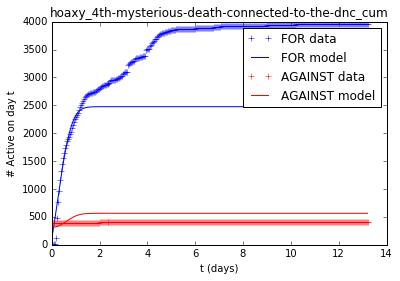

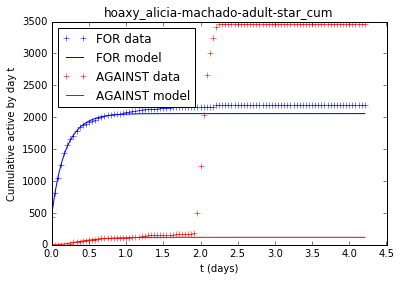

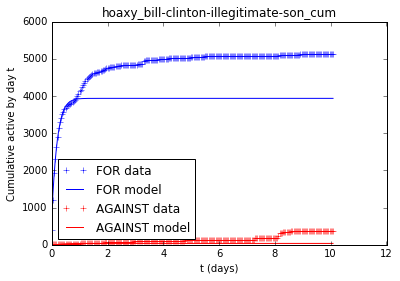

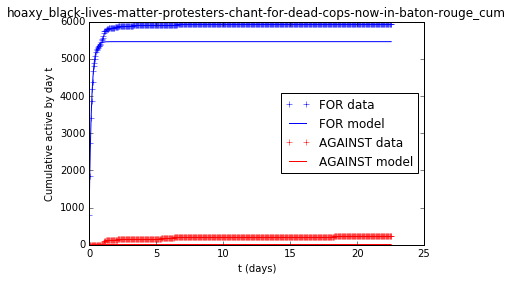

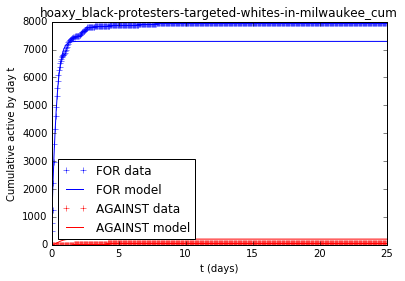

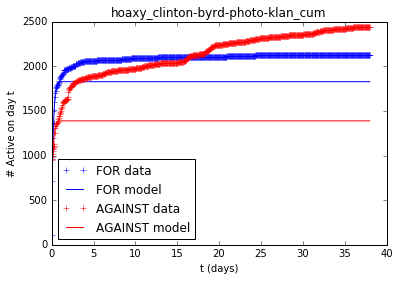

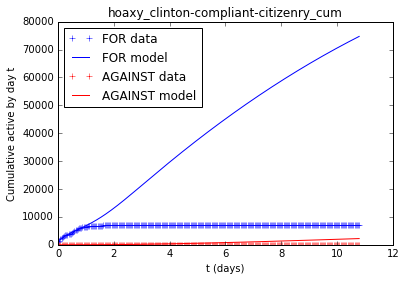

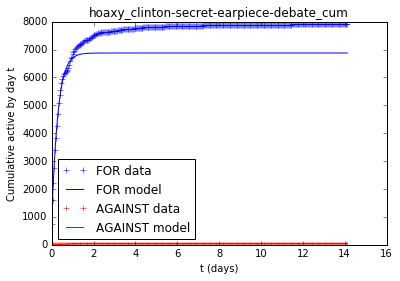

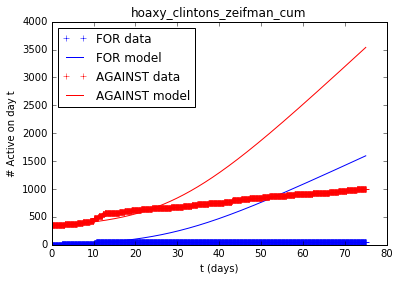

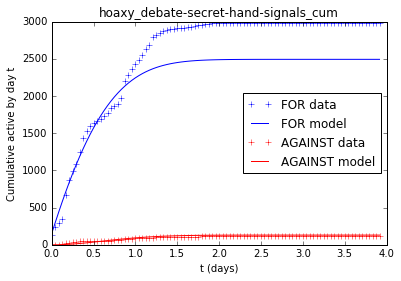

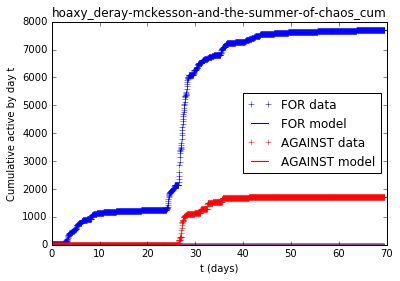

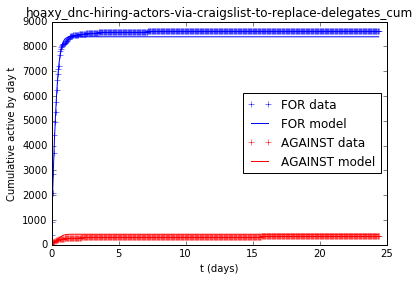

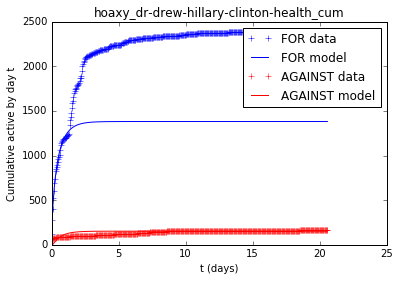

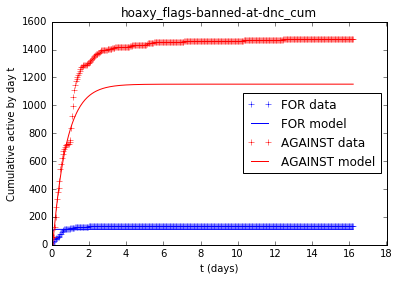

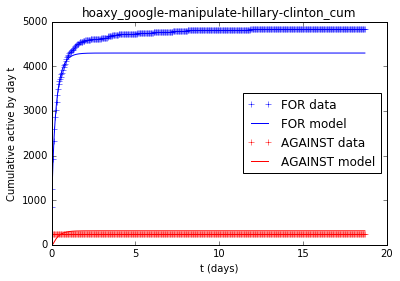

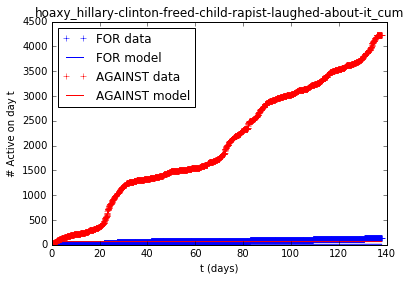

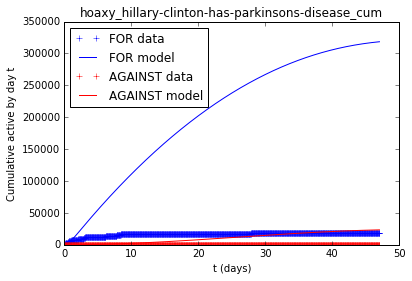

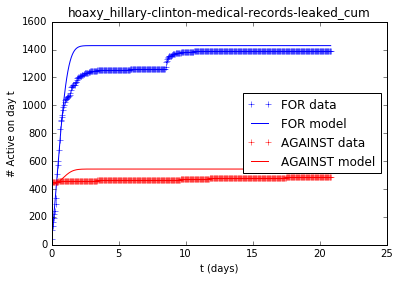

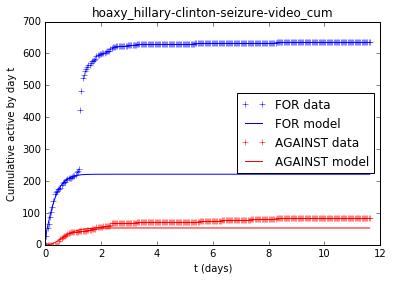

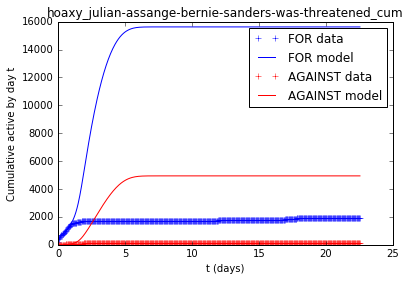

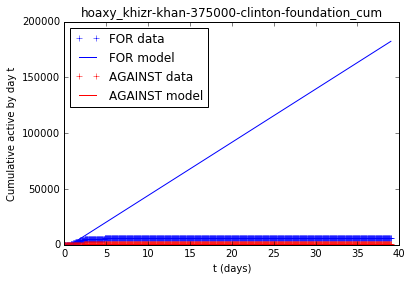

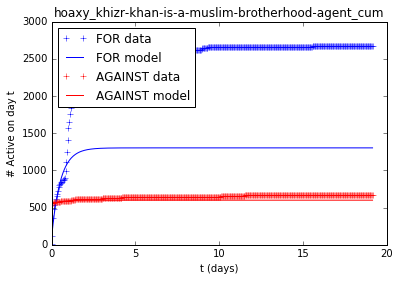

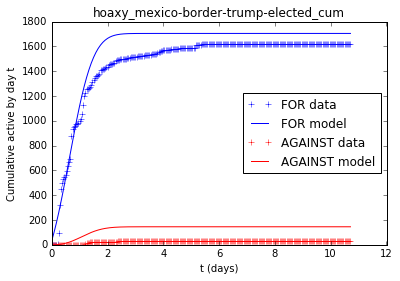

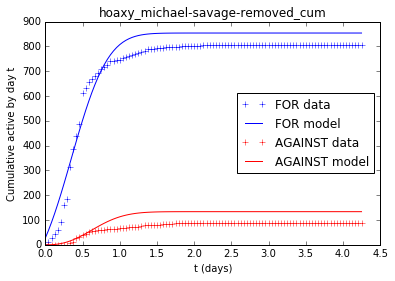

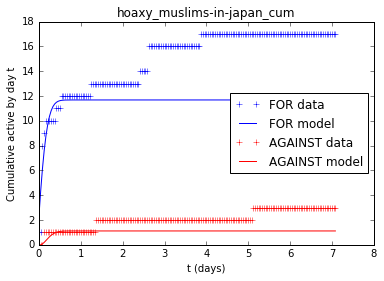

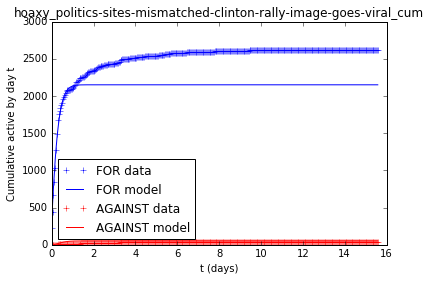

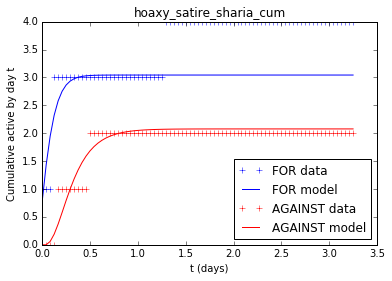

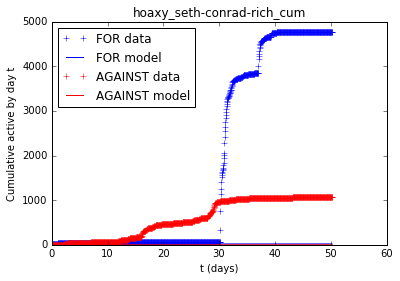

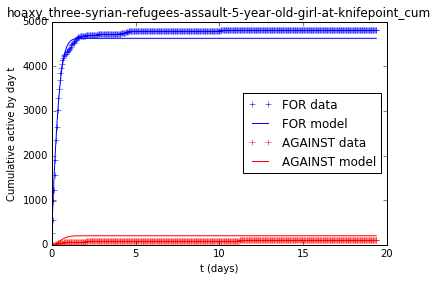

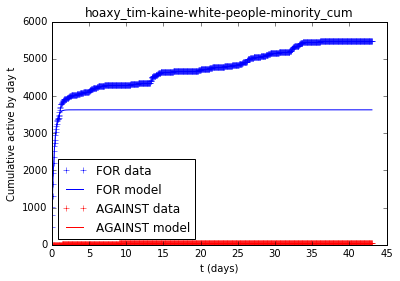

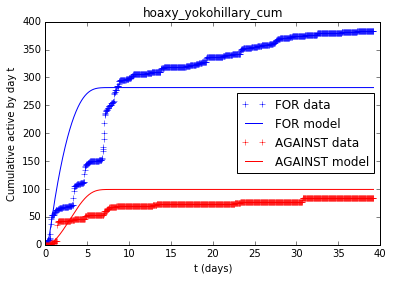

In [122]:
fit_T = 24 # 24 hours

for i in np.linspace(0,len(list_of_files)-1,len(list_of_files),dtype=int):

    # READ DATA

    file_name = str(list_of_files[i])
    hoax_data = pd.read_csv(path_file+file_name+'.csv',parse_dates=True)
    for_users = hoax_data["For"]
    against_users = hoax_data["Against"]
    t_empirical=np.arange(0,len(for_users))

    # FILTER DATA

    # remove the initial plateau from the data
    first_nonzero = np.nonzero(for_users)[0][0]
    for_users = for_users[first_nonzero:]
    against_users = against_users[first_nonzero:]

    # find the position of the end of the dynamics (including buffer plateau at end of length plateau_threshold)
    d_for_users = np.subtract(for_users[plateau_threshold-1:],for_users[0:-plateau_threshold+1]);
    d_against_users = np.subtract(against_users[plateau_threshold-1:],against_users[0:-plateau_threshold+1]);
    plateau = np.nonzero((np.add(d_for_users,d_against_users))==0)[0];
    if (plateau.size > 0):
        temporal_window = plateau[0] + plateau_threshold
        for_users = for_users[0:temporal_window]
        against_users = against_users[0:temporal_window]

    t_empirical=np.arange(0,len(for_users))

    # CURVEFIT AND PLOT

    if against_users.values[0] > for_users.values[0]:
        #params = [alpha, ONEoverN, ba_init, bi_init, fa_init, fi_init, pv, omega]
        param0 =0.5,0.0001,0.001,0.001,0.001, 0.001, 0.5,0.5
        param_bounds =([0., 0., 0, 0., 0., 0., 0., 0.], [1., 1., 1., 1., 1. ,1., 1., 1.])

        # Curve fit
        T_double = np.append(t_empirical[0:fit_T], t_empirical[0:fit_T])
        data_double = np.append(for_users[0:fit_T], against_users[0:fit_T])
        popt, cov = curve_fit(fit_mf_noseg_FI, T_double, data_double, p0=param0,bounds=param_bounds, max_nfev=10000)

        # Plot
        BA, FA = mf_noseg_FI(t_empirical,*popt)
        pp.figure()
        pp.plot(t_empirical/24., for_users, 'b+',t_empirical/24., 
            BA,'b-', t_empirical/24., against_users, 'r+',t_empirical/24., 
            FA,'r-')
        pp.xlabel("t (days)")
        pp.ylabel("# Active on day t")
        pp.title(file_name)
        pp.legend(['FOR data', 'FOR model','AGAINST data', 'AGAINST model'],loc=0)
        pp.savefig("../../output/hoaxy_ALL/"+str(i+1)+"_noseg_1dayfit.pdf")
        pp.show()

    else:
        #params = [alpha, ONEoverN, ba_init, bi_init, fa_init, fi_init, pv, omega]
        param0 =0.5,0.0001,0.001, 0.001, 0.5,0.5
        param_bounds =([0, 0., 0., 0., 0., 0.], [1., 1., 1., 1., 1. ,1.])

        # Curve fit
        T_double = np.append(t_empirical[0:fit_T], t_empirical[0:fit_T])
        data_double = np.append(for_users[0:fit_T], against_users[0:fit_T])
        popt, cov = curve_fit(fit_mf_noseg, T_double, data_double, p0=param0,bounds=param_bounds, max_nfev=10000)

        # Plot
        BA, FA = mf_noseg(t_empirical,*popt)
        pp.figure()
        pp.plot(t_empirical/24., for_users, 'b+',t_empirical/24., 
            BA,'b-', t_empirical/24., against_users, 'r+',t_empirical/24., 
            FA,'r-')
        pp.xlabel("t (days)")
        pp.ylabel("Cumulative active by day t")
        pp.title(file_name)
        pp.legend(['FOR data', 'FOR model','AGAINST data', 'AGAINST model'],loc=0)
        pp.savefig("../../output/hoaxy_ALL/"+str(i+1)+"_noseg_1dayfit.pdf")
        pp.show()
    